<h1>Depeche Mode Lyrics &amp; Popularity Analysis</h1>

There are two parts of analysis using two different data sources(CSV &amp; web scraping).
<h2> Table of contents</h2>
<hr></hr>
<h3>Introduction</h3>
About the aim &amp; data used in the prohects

<h3>Part 1: Lyrics from the Spotify CSV </h3>

1.1 Preparing data for analysis <br>
1.2 Tokenization and Lemmatization<br>
1.3 Sentiment Intensity analysis <br>
1.4 Visualization of the SIA  <br>
&emsp; 1.41 Pie charts (Ratios of pos, neu, neg of songs)<br>
&emsp; 1.42 Bar chart (Sentiment of songs)  <br>

1.5 What words are judged as negative, pos, neu ? <br>
1.6 Words Frequecy analysis <br>

1.7 Visualization with words frequency <br>
&emsp; 1.61 IDF line graph of negative words<br>
&emsp; 1.62 word cloud with negative words<br>
&emsp; 1.63 word cloud with positive words<br>
    
<h3>Part 2: Discography and hit chart ranking records scraped from wikipedia</h3>

2.1 Scraping from wikipedia<br>
2.2 Prepping data for analysys <br>
2.3 Analysis on hit chart ranking data  <br>
2.4 Combine hit chart analysis with sentiment analysis<br>
2.5 Visualization <br>
&emsp;   2.51 Bar chart (Top 10 songs Sentiments Bar chart)<br>
&emsp;   2.52 Pie chart (Ratio of hit singles by decade)<br>
&emsp;   2.53: Line chart: Median sentiment Analysis by decade<br>
&emsp;   2.54: Word cloud: Hit singles
<h3> Conclusion </h3>
Conclusion drawn from the analysis and learning from working on it
<br>

<h3> Appendix </h3>
Resources
<hr></hr>
<br>

<h1>Introduction</h1>
<h2>Aim</h2>

I found NPL interesting and I am a fan of Depeche Mode. Their music is known as dark but is it really dark? What are their top choice of words? Which song is the darkest or happiest? Which decade is the darkest? Are their negative songs more popular? I wanted to find out data-scientifically by using Natural Language Toolkit (NLTK) sentiment analysis of their songs. I also wanted to make an observation of how NLTK analyzers perform compared to our perception by analyzing the metrics of the songs people consider the darkest and happiest songs. I am also curious to see if there are relationstip between popularity and the sentiment of the song.


<h2>Data used in the proejct</h2>

Initially I found the website of Depeche Mode where they have their lyrics. Thought of scraping from there however this seems unethical. I didn’t want to slow down their site.  Also obtaining music related is tricky unless Meta data because generally copyrighted and also US law of Digital Millennium Copyright Act (DMCA). 
This is not my commercial gain so technically it is ok however as a precaution I tried to find a more legitimate way. I have looked at Genius, a popular lyrics site, however they do not  provide lyrics via apis. Genius prohibits scraping when  reading their terms( https://genius.com/static/terms).  I found a third-party library(Lyrics Genius) to get lyrics from Genius but it does use scraping so it is a gray area! eventually I found that spotify released a large dataset called “The Million Playlist Dataset: Learning from Music Playlists”  and someone put this on Kaggle (https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset)

This data was so huge(74mb) which is over 10mb the requirements for the submission. 
Extracting data and create a new smaller csv file I started by extracting necessary data and creating another csv file small enough for submission. I used python’s CSV module and Pandas for this.
Code: Since the original dataset can not be submitted only showing in markdown for this section.

After I created a file. The data file came down to less than 6.5mb!  However I noticed the original 74mb file  did not have an album names or years.

Fortunately, the discography is not sensitive data and they are on wikipedia ( https://en.wikipedia.org/wiki/Depeche_Mode_discography ). Wikipedia’s terms allow reuse of their articles and other media under free and open licenses.(https://foundation.wikimedia.org/wiki/Policy:Terms_of_Use) 

Also it is whitelisted in Anaconda (https://www.pythonanywhere.com/whitelist/ )

Since my lyrics data  do not contain their latest songs,  my research are reflections of songs from  1980’s, 1990’s,  2000’s and 2010s.


<h3>Installing modules and libraries</h3>

In [1]:
#istalling modules
import sys
get_ipython().system('{sys.executable} -m pip install wordcloud')
# get_ipython().system('{sys.executable} -m pip install pandas')

# get_ipython().system('{sys.executable} -m pip install nltk')


In [2]:
import csv
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import webtext, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [3]:
nltk.download('stopwords')#articles, pronouns, prepositions, and conjunctions
nltk.download('vader_lexicon') # for sentimemnt analysis
nltk.download('punkt')# divides a text into a list of word
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
# stopwords.words('english')
# nltk.download('state_union')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
#lemmertizing 
#using WordNetLemmatizer() to group inflected forms. 
#download wordnet to use lemmertizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1> Part1: Lyryrics analysis from csv</h1>

Spotify's millison song data Please Noe: The original data was huge (75MB) so minified prior to starting analysis to fit in the file size restriction for submission. 

<h2> 1.1: Prepping data for analysis</h2>  Loading data, data extracting and cleaning 

<h3>Creating Data Frame from (minified version of) CSV </h3>

In [5]:
df=pd.read_csv('minified_spotify.csv',encoding='utf-8', keep_default_na=False,skipinitialspace=True)
df


,Unnamed: 0,artist,song,lyrics
0,0,Billy Joel,Christie Lee,Let me tell you a story \r\nAbout a woman and...
1,1,Billy Joel,Christmas In Fallujah,It's evening in the desert \r\nI'm tired and ...
2,2,Billy Joel,Close To The Borderline,"Blackout, heatwave,.44 caliber homicide \r\nT..."
3,3,Billy Joel,Code Of Silence,Everybody's got a million questions \r\nEvery...
4,4,Billy Joel,Don't Worry Baby (Live),"(This one's for Alexa, okay?) \r\n \r\nAh, a..."
...,...,...,...,...
5508,4608,Diana Ross,Love Is Like An Itching In My Heart,"The love bug done bit me, \r\nDidn't mean for..."
5509,4609,Diana Ross,Love Lies,"Whenever I touch you lately, you seem to pull ..."
5510,4610,Diana Ross,Love Me,Love me \r\n \r\nLove me the way that you lo...
5511,4611,Diana Ross,Love On The Line,When I don't see you \r\nAnd I don't know whe...


In [6]:
print(type(df))
print(df.shape)
print(df.all(axis=0))
print(df.index)

<class 'pandas.core.frame.DataFrame'>
(5513, 4)
Unnamed: 0    False
artist         True
song           True
lyrics         True
dtype: bool
RangeIndex(start=0, stop=5513, step=1)


 <!-- <h2>Creating Dataframe just with Depeche Mode Song</h2> -->

167 song lyrics

<h2>Check if it has every song is lyrical. means lyrics cell should not be empty.</2>

In [7]:
empty_rows = df.isnull().all(axis=1)
print(empty_rows)

#print out each row see if True's there
for i in empty_rows:
    if i == True: 
        print("empty",i)


0       False
1       False
2       False
3       False
4       False
        ...  
5508    False
5509    False
5510    False
5511    False
5512    False
Length: 5513, dtype: bool


<h2>check/ remove duplicate</h2>

In [8]:
df_lyrics = df.drop_duplicates(subset=['song'])
print(len(df_lyrics))


5201


<!-- <h2>It seems there's no duplicate but lets see what songs are in the data</h2> <p> lets display by alphabetical order.</p> -->

<h2>See we got the artist we need our data</h2>

In [9]:
def find_artist_only(df_p,name):
    row_index = df.loc[df['artist'] == name].index
    print(row_index)


In [10]:
find_artist_only(df, "Depeche Mode")



Index([ 682,  683,  684,  685,  686,  687,  688,  689,  690,  691,
       ...
       5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285],
      dtype='int64', length=167)


In [11]:
find_artist_only(df, "Black Sabbath")

Index([  86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
       ...
       1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367],
      dtype='int64', length=156)


<h2>function to find a song</h2>

In [12]:
def find_song(panda_df,song_title):
    for index, row in panda_df.iterrows():
        #iterating Indexes and rows
     #lower case since title case is tricky
        if row['song'].lower() == song_title.lower():
            return row['song'] + " exists at " + str(index)
        
    return song_title + ' doesnt exist'
            

In [13]:
#I first wanted to try with the DM song I know . 
find_song(df,"Blasphemous Rumours")

'Blasphemous Rumours exists at 5198'

In [14]:
#Find another very dark song
find_song(df,"Black Sabbath")


'Black Sabbath exists at 91'

# create new Data frame with only Depeche mode songs

In [15]:
def save_panda_df(df_part, artist):
    artist_list=[]
    song_list = []
    lyrics_list = []
    
    for index, row in df_part.iterrows():
        if row['artist'] == artist:
            artist_list.append(row['artist'])
            song_list.append(row['song'])
            lyrics_list.append(row['lyrics'])

    #first save to dictionary
    dict_dm = {'artist': artist_list,'song': song_list, 'lyrics': lyrics_list }

    #saving to data frame
    field_names_all = ['artist','song_title', 'lyrics'] 
    artist_df = pd.DataFrame(dict_dm)
    
    return artist_df



In [16]:
#DF for all of DM songs 
depeche_lyrics_df= save_panda_df(df, 'Depeche Mode')
depeche_lyrics_df.head()

,artist,song,lyrics
0,Depeche Mode,Addiction,"I can't help it, I'm not sure what to do \r\n..."
1,Depeche Mode,All That's Mine,I know it's hard to reach you \r\nI know it's...
2,Depeche Mode,And Then...,Let's take a map of the world \r\nTear it int...
3,Depeche Mode,Any Second Now,She remembered all the shadows and the doubts ...
4,Depeche Mode,Barrel Of A Gun,Do you mean this horny creep \r\nSet upon wea...


<h2>See what DM songs are there in alphabetical order</h2>

In [17]:
#sort in alphabetical order
depeche_lyrics = depeche_lyrics_df.sort_values('song')

for row in depeche_lyrics['song']:
    print(row)


A Pain That I'm Used To
A Photograph Of You
A Question Of Lust
A Question Of Time
Addiction
All That's Mine
Alone
Always
And Then...
Any Second Now
Barrel Of A Gun
Behind The Wheel
Better Days (Basteroid 'Dance Is Gone' Vocal Mix)
Black Celebration
Blasphemous Rumours
Blue Dress
Boys Say Go!
Breathe
But Not Tonight
Clean
Comatose
Come Back
Coming Back To You
Compulsion (Evolution Mix)
Condemnation
Corrupt
Damaged People
Dangerous
Death's Door
Dirt
Dream On
Dreaming Of Me
Dressed In Black
Enjoy The Silence
Everything Counts
Fly On The Windscreen
Fools
Fragile Tension
Free
Freelove
Freestate
Get Right With Me
Get The Balance Right
Ghost
Gone (The Vacuous House Mix)
Goodbye
Goodnight Lovers
Halo
Happens All The Time
Happiest Girl
Heaven
Heaven II
Here Is The House
Higher Love
Hole To Feed
Home
I Am You
I Feel Loved
I Feel You
I Like It
I Sometimes Wish I Was Dead
I Want It All
I Want You Now
Ice Machine
If You Want
In A Manner Of Speaking (Trandy Mix)
In Chains
In Sympathy
In Your Memory


<h2> Brackets after song usually indicates alt or mix version. But if there's no original version we need to keep that version. </h2> <p> Perhaps we can search of brackets and if it hits check song one before?    </p>

In [18]:
print(type(depeche_lyrics['song']))


for row in depeche_lyrics.itertuples():
    #if tuple contains no alpha
#     print(type(row.song))
#     print(row.song)
    
    if row.song.isalpha() == False:      
        # see if it is [ ] ( )
        if row.song.endswith(']') or row.song.endswith(')'):            
            print("matched song and index: ", row.song , row.Index)

<class 'pandas.core.series.Series'>
matched song and index:  Better Days (Basteroid 'Dance Is Gone' Vocal Mix) 6
matched song and index:  Compulsion (Evolution Mix) 87
matched song and index:  Gone (The Vacuous House Mix) 98
matched song and index:  In A Manner Of Speaking (Trandy Mix) 110
matched song and index:  Never Turn Your Back On Mother Earth (Bong Magazine) 36
matched song and index:  Smile In A Crowd (Oriental Mix) 53
matched song and index:  Song For Europe (Unreleased Track) 56
matched song and index:  Useless [The Kruder And Dorfmeister Session] 162


# Make sure NOT removing remixed songs without the original version


In [19]:
#make sure NOT removing remixed songs withouy the original version

# Better Days, Compulsion,Gone, In A Manner Of Speaking , 
# Never Turn Your Back On Mother Earth , Smile In A Crowd, Song For Europe, Useless

songs_with_remixes = ['Better Days', 'Compulsion', 'Gone', 'In A Manner Of Speaking', 'Never Turn Your Back On Mother Earth' , 'Smile In A Crowd', 'Song For Europe', 'Useless' ]


for index in range (len(songs_with_remixes)):

    print(find_song(depeche_lyrics_df, songs_with_remixes[index]))
   


Better Days doesnt exist
Compulsion doesnt exist
Gone doesnt exist
In A Manner Of Speaking doesnt exist
Never Turn Your Back On Mother Earth doesnt exist
Smile In A Crowd doesnt exist
Song For Europe doesnt exist
Useless exists at 68


<h2>The ones I should remove is  remix version of Useless [The Kruder And Dorfmeister Session]</h2>

In [20]:
#save only rows not matching with a square bracket
depeche_lyrics_df = depeche_lyrics_df[depeche_lyrics_df['song'].str.contains('\[.*')==False ]

In [21]:
depeche_lyrics_df

,artist,song,lyrics
0,Depeche Mode,Addiction,"I can't help it, I'm not sure what to do \r\n..."
1,Depeche Mode,All That's Mine,I know it's hard to reach you \r\nI know it's...
2,Depeche Mode,And Then...,Let's take a map of the world \r\nTear it int...
3,Depeche Mode,Any Second Now,She remembered all the shadows and the doubts ...
4,Depeche Mode,Barrel Of A Gun,Do you mean this horny creep \r\nSet upon wea...
...,...,...,...
161,Depeche Mode,Tora! Tora! Tora!,They were raining from the sky \r\nExploding ...
163,Depeche Mode,Waiting For The Night,I'm waiting for the night to fall \r\nI know ...
164,Depeche Mode,Walking In My Shoes,I would tell you about the things \r\nThey pu...
165,Depeche Mode,Welcome To My World,Welcome to my world \r\nStep right through th...


<h1>1.2 Tokenization &amp; lemmatization<h1>

<h2>Function to tokenize by song</h2> Using for sentimant intensity analysis

In [22]:
#Function to tokenize by song
# print(depeche_lyrics['lyrics'][row])
def tokenize_song(panda_df, row_index):
    song_words = []
    row = row_index

    song= panda_df[row]
# lemmatizer only works with lowercase
#     using nltk tokenise vs python?
    song_words = song_words+nltk.word_tokenize(song.lower())
#    song_words=song.lower().split()
    return song_words
     


In [23]:
#try with Blasphemous Rumour
tokenize_song(depeche_lyrics_df['lyrics'],79)
print(tokenize_song(depeche_lyrics_df['lyrics'],79))

['girl', 'of', 'sixteen', 'whole', 'life', 'ahead', 'of', 'her', 'slashed', 'her', 'wrists', 'bored', 'with', 'life', 'did', "n't", 'succeed', 'thank', 'the', 'lord', 'for', 'small', 'mercies', 'fighting', 'back', 'the', 'tears', 'mother', 'reads', 'the', 'note', 'again', 'sixteen', 'candles', 'burn', 'in', 'her', 'mind', 'she', 'takes', 'the', 'blame', 'it', "'s", 'always', 'the', 'same', 'she', 'goes', 'down', 'on', 'her', 'knees', 'and', 'prays', '[', 'chorus', 'x', '2', ']', 'i', 'do', "n't", 'want', 'to', 'start', 'any', 'blasphemous', 'rumors', 'but', 'i', 'think', 'that', 'god', "'s", 'got', 'a', 'sick', 'sense', 'of', 'humor', 'and', 'when', 'i', 'die', 'i', 'expect', 'to', 'find', 'him', 'laughing', 'girl', 'of', 'eighteen', 'fell', 'in', 'love', 'with', 'everything', 'found', 'new', 'life', 'in', 'jesus', 'christ', 'hit', 'by', 'a', 'car', 'ended', 'up', 'on', 'a', 'life', 'support', 'machine', 'summer', "'s", 'day', 'as', 'she', 'passed', 'away', 'birds', 'were', 'singing', 

<h2> Function to tokenize all songs</h2> Using for word cloud

In [24]:
#Function to tokenize all songs
def tokenize_all_songs(panda_df):
    all_song_words_2d = []
    
    #iterate rows in df and calling song tokenise function above
    for index, row in panda_df.iterrows():
        all_song_words_2d.append(tokenize_song(panda_df['lyrics'],index))

    #flatten to 1D list
    all_song_words_flat = [item for row in all_song_words_2d for item in row]

    # print(len(all_song_words_2d))
#     print(all_song_words_flat)
    return all_song_words_flat

#All Depeche Mode songs 
print(tokenize_all_songs(depeche_lyrics_df))


['i', 'ca', "n't", 'help', 'it', ',', 'i', "'m", 'not', 'sure', 'what', 'to', 'do', 'does', 'seem', 'crazy', ',', 'no', 'good', 'for', 'my', 'health', 'i', "'ve", 'seen', 'the', 'doctor', ',', 'he', "'s", 'come', 'to', 'look', 'at', 'me', 'if', 'you', 'do', "n't", 'believe', 'it', ',', 'do', "n't", 'believe', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'now', 'i', "'m", 'saying', 'how', 'i', "'m", 'going', 'to', 'need', 'a', 'pill', 'i', 'need', 'you', 'like', 'a', 'drug', 'to', 'keep', 'my', 'fill', 'i', 'ca', "n't", 'remember', 'everything', 'i', 'do', 'now', 'i', 'put', 'them', ',', 'it', "'s", 'only', 'good', 'to', 'you', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'you', 'ca', "n't", 'help', 'but', 'look', 'me', 'in', 'the', 'eye', 'while', 'i', 'come', 'running', ',', 'i', 'do', "n't", 'know', '

<h2>Function to remove stop words </h2>

In [25]:
def stopWords(words_list):

    unique_words = [word for word in words_list if not word in stopwords.words('english') and word.isalpha()] 

    
#     customized_stopwords=['chorus', "can't", 'ca', "n't", "'ve", 'i', "'m", 'the', 'you', 'to', 'and', 'it', 'for', 'me','my', 'at', '\'s', 'could','would','might', "that's", "i'm", 
#                           "we're", "there's",'perhaps','also','that’s','it’s',',','!', '?']
    customized_stopwords=['chorus','x', "'ve", 'i', "'m", 'the', 'you', 'to', 'and', 'it', 'for', 'me','my', 'at', '\'s', 'could','would','might', "that's", "i'm", 
                          "we're", "there's",'perhaps','also','that’s','it’s']

    unique_words_2 = [word for word in unique_words if not word in customized_stopwords] 
    
    return unique_words_2

print(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79)))



['girl', 'sixteen', 'whole', 'life', 'ahead', 'slashed', 'wrists', 'bored', 'life', 'succeed', 'thank', 'lord', 'small', 'mercies', 'fighting', 'back', 'tears', 'mother', 'reads', 'note', 'sixteen', 'candles', 'burn', 'mind', 'takes', 'blame', 'always', 'goes', 'knees', 'prays', 'want', 'start', 'blasphemous', 'rumors', 'think', 'god', 'got', 'sick', 'sense', 'humor', 'die', 'expect', 'find', 'laughing', 'girl', 'eighteen', 'fell', 'love', 'everything', 'found', 'new', 'life', 'jesus', 'christ', 'hit', 'car', 'ended', 'life', 'support', 'machine', 'summer', 'day', 'passed', 'away', 'birds', 'singing', 'summer', 'sky', 'came', 'rain', 'tear', 'fell', 'mother', 'eye']


<h2>Function to lemmatize Tokens</h2>

In [26]:
ps=PorterStemmer()
lem = WordNetLemmatizer()



#function to lemmatize 

def lemmatize_token(tokens):
    lemmatized_tokens = [lem.lemmatize(word) for word in tokens]
#     return ' '.join(lemmatized_tokens)# string
    return lemmatized_tokens

lemmed=lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79)))
print(lemmed)
print(type(lemmed))

['girl', 'sixteen', 'whole', 'life', 'ahead', 'slashed', 'wrist', 'bored', 'life', 'succeed', 'thank', 'lord', 'small', 'mercy', 'fighting', 'back', 'tear', 'mother', 'read', 'note', 'sixteen', 'candle', 'burn', 'mind', 'take', 'blame', 'always', 'go', 'knee', 'prays', 'want', 'start', 'blasphemous', 'rumor', 'think', 'god', 'got', 'sick', 'sense', 'humor', 'die', 'expect', 'find', 'laughing', 'girl', 'eighteen', 'fell', 'love', 'everything', 'found', 'new', 'life', 'jesus', 'christ', 'hit', 'car', 'ended', 'life', 'support', 'machine', 'summer', 'day', 'passed', 'away', 'bird', 'singing', 'summer', 'sky', 'came', 'rain', 'tear', 'fell', 'mother', 'eye']
<class 'list'>


In [117]:
#test frequcy with Blasphemous Rumours
word_freq_dp_song = nltk.FreqDist(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))

word_freq_dp_song

FreqDist({'life': 4, 'girl': 2, 'sixteen': 2, 'tear': 2, 'mother': 2, 'fell': 2, 'summer': 2, 'whole': 1, 'ahead': 1, 'slashed': 1, ...})

<h2> Put tokens back in the string format</h2>
becuase polarity score takes text not list

In [28]:
# cleaned tokens as a text corpus
def clean_corp(token_list):
    corp = ""

    for word in token_list:
        corp = corp +   word + " " 
    return corp



In [29]:
cl_cp=clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))

cl_cp

'girl sixteen whole life ahead slashed wrist bored life succeed thank lord small mercy fighting back tear mother read note sixteen candle burn mind take blame always go knee prays want start blasphemous rumor think god got sick sense humor die expect find laughing girl eighteen fell love everything found new life jesus christ hit car ended life support machine summer day passed away bird singing summer sky came rain tear fell mother eye '

<h1>1.3 Sentiment Analysis </h1>

<h2>Sentiment Analysis Test Function</h2>

In [30]:
def sent_analyze(corp):
    # create an instance analyzer
    sia = SentimentIntensityAnalyzer()
    
    
    #sentiment analysis for a song
    pol_score = sia.polarity_scores(corp)
    
    return pol_score

In [31]:
#print out Depeche Mode's "Blasphemous Rumours" analysis
print("stopwords filtered", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))))


stopwords filtered {'neg': 0.161, 'neu': 0.578, 'pos': 0.261, 'compound': 0.8442}


<h2>Function to save (to dataframe) the results of all sentiment analysis by song</h2>

In [32]:
#Function to save (to dataframe) the results of sentiment analysis by song

def save_sent_analyze_by_song(panda_df):
    
    all_sas_2d=[]
    sas = [ ] #pol scores
    song_names = [] #song names
    indices =[]
    #loop over DF 
    #iterate rows in df and calling previously wriiten functions for tokenize lemmatize and sentiment analysis function 
    for index, row in panda_df.iterrows():

        col = (panda_df['song'][index])
        song_names.append((panda_df['song'][index]))
        indices.append(index)

        sa =sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(panda_df['lyrics'],index)))))  
        sas.append(sa)
        sa_df = pd.DataFrame(sas, index = song_names)
       
        #sa_df = pd.DataFrame(sas, song_names)
        
#         print(indices)
     
    return sa_df
    


In [33]:
sa_df_dm = save_sent_analyze_by_song(depeche_lyrics_df)
sa_df_dm

,neg,neu,pos,compound
Addiction,0.029,0.730,0.242,0.9501
All That's Mine,0.172,0.573,0.255,0.8373
And Then...,0.050,0.663,0.286,0.9118
Any Second Now,0.135,0.597,0.268,0.8176
Barrel Of A Gun,0.341,0.557,0.101,-0.9590
...,...,...,...,...
Tora! Tora! Tora!,0.179,0.573,0.248,0.6549
Waiting For The Night,0.075,0.653,0.272,0.9670
Walking In My Shoes,0.065,0.840,0.095,0.4767
Welcome To My World,0.257,0.463,0.280,-0.2023


<h2>Top Negative  &amp; Positve DM songs</h2>

In [34]:
#sort by top negative song
sa_df_dm_sorted_compound=sa_df_dm.sort_values(by=['compound'])

In [35]:
#top negative songs
sa_df_dm_sorted_compound.head()

,neg,neu,pos,compound
Wrong,0.705,0.254,0.042,-0.9995
Shame,0.407,0.459,0.134,-0.9890
Free,0.417,0.447,0.137,-0.9800
New Dress,0.236,0.723,0.041,-0.9747
Dangerous,0.436,0.481,0.083,-0.9702


<h3>The most negative song of DM is "Wrong".  Compound is almost  -1 !!! </h3>

In [36]:
#top positive songs
sa_df_dm_sorted_compound.tail()

,neg,neu,pos,compound
Happiest Girl,0.031,0.446,0.523,0.9948
I Feel You,0.000,0.514,0.486,0.9951
I Like It,0.041,0.286,0.674,0.9972
What's Your Name?,0.000,0.465,0.535,0.9979
Freelove,0.109,0.314,0.577,0.9987


<h3>Most Positive song is "Freelove" and compond is almost 1 !</h3>  

<h2>Mean Value for each sentiment</h2>

In [37]:
sa_df_mean = sa_df_dm.mean()
sa_df_mean

neg         0.154169
neu         0.575313
pos         0.270620
compound    0.414433
dtype: float64

In [38]:
sa_df_med = sa_df_dm.median()
sa_df_med

neg         0.13600
neu         0.56350
pos         0.26800
compound    0.83665
dtype: float64

<h3>Compound says  0.407116 </h3>  Compound goes -1 to 1 so  <= -0.5 can be said negative,  Depeche Mode's average sentiment per song lyrics are not negative at all! Very interesting!

<h2>highest values of each sent  DM songs</h2>



In [39]:
#highest of each sent  DM songs
sa_df_max = sa_df_dm.max()
sa_df_max

neg         0.7050
neu         0.8760
pos         0.6740
compound    0.9987
dtype: float64

<h2>lowest values of each sent  DM songs</h2>


In [40]:
#lowest of each sent  DM songs
sa_df_min = sa_df_dm.min()
sa_df_min

neg         0.0000
neu         0.2480
pos         0.0000
compound   -0.9995
dtype: float64

<h2> Comparison to other songs positive &amp negative song </h2>It's bit too vague with just looking at  sentiment numbers of DM songs. Let's compare with the 'Lovely day' by Bill Withers which is perceived by positive song by many people according to the google search. Black Sabbath' Black Sabath is one of the darkest song according to the goole search



<h2>positive song</h2>

In [41]:
#save new song to DF
bill_withers_lyrics_df= save_panda_df(df, 'Bill Withers')

#find the song in DF
find_song(bill_withers_lyrics_df,"Lovely Day")


'Lovely Day exists at 18'

In [42]:
#sentiment analysis 
print("Lovely Day by Bill Withers: ", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(bill_withers_lyrics_df['lyrics'],18))))))


Lovely Day by Bill Withers:  {'neg': 0.032, 'neu': 0.593, 'pos': 0.375, 'compound': 0.9881}


<h2>Black Sabbath' Black Sabath</h2>

In [43]:
#save new song to DF
blacksabbath_lyrics_df= save_panda_df(df, 'Black Sabbath')

#find the song in DF
find_song(blacksabbath_lyrics_df,"Black Sabbath")

'Black Sabbath exists at 5'

In [44]:
#Black Sabbath
#sentiment analysis 
print("Black Sabbath by  Black Sabbath: ", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(blacksabbath_lyrics_df['lyrics'],5))))))


Black Sabbath by  Black Sabbath:  {'neg': 0.164, 'neu': 0.576, 'pos': 0.26, 'compound': 0.7783}


<h1>1.4 Visualization:</h1> 
<h2>1.41 Pie charts</h2>
Those numbers are bit too hard to comprehend so lets visualize.
Pie chart semms to show the ratio of positive, negative and neutral in the more clear manner than bar chart.  ( exlusing compound here) Therefore I am utilizing pie 
chart here to compare with Depechemode songs and Lovely Day.

In [45]:
# function for creaying pie chart from pol score
def create_pie(pol_score, chart_title):
        
    pol_label_list = []
    pol_score_list= []    
    slice_colors = ['#92a8d1','#d5f4e6','#ffef96'] #neg, neu,pos
    #deeaee  #f7786b  #b1cbbb
    
    #chart name
    plt.title(chart_title)

#     pol_label_list = list(pol_score.keys())
#     pol_score_list = list(pol_score.values() 
        
# loop version is better for excluding 'compound'    
    for x in pol_score:
        #exclude compound
        if (x != 'compound'):
            # conditionals for label name to full spelling for clarity
            if x == 'neu':
                pol_label_list.append('Neutral')
            elif x == 'pos':
                pol_label_list.append('Positive')
            else:
                pol_label_list.append('Negative')
                
            pol_score_list.append(pol_score[x])
    

    y = np.array(pol_score_list)
    
    # plot with labels and automatic percentage for clarity
    plt.pie(y,labels = pol_label_list, autopct='%1.1f%%', colors=slice_colors) 
   
    plt.show()

    

<h2>Pie Chart of "Black Sabbath by Black Sabbath"  &amp   "Lovely Day by Bill Withers"</h2> Songs preceived as most positive and most negative according to the internet.

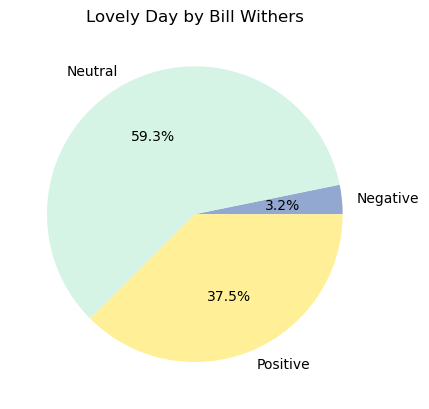

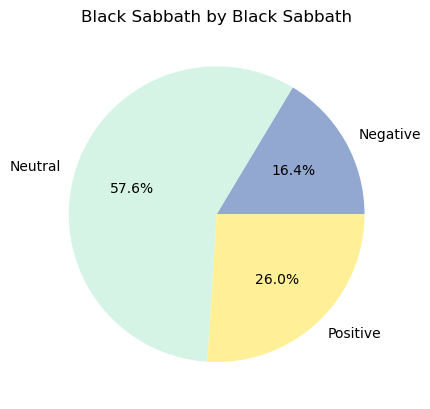

In [46]:
# "Lovely Day"    
pol_score_lovelyday=sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(bill_withers_lyrics_df['lyrics'],18)))))

#Black Sabbath by Black Sabbath 
pol_score_bs_bs= sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(blacksabbath_lyrics_df['lyrics'],5)))))


pie1= create_pie(pol_score_lovelyday, "Lovely Day by Bill Withers")
pie2= create_pie(pol_score_bs_bs, "Black Sabbath by Black Sabbath")




<h2>Piechart: Depeche mode songs</h2> Most negative song and the mean value( average by song)

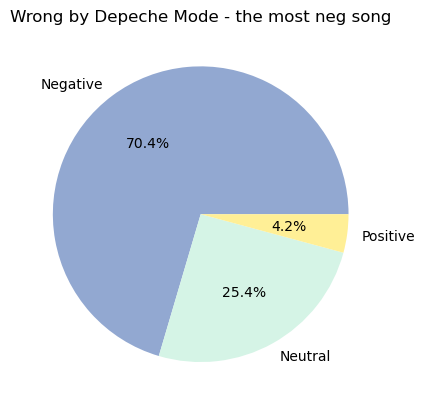

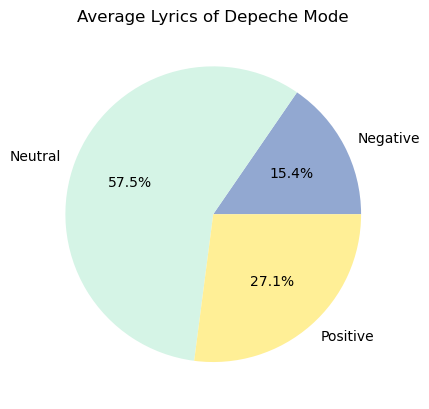

In [47]:

#Depeche Mode analysis: The most neg song and the mean val per son
pol_score_dm_neg=sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],166)))))

#Mean of DM songs
pol_score_dm_mean = sa_df_dm.mean() 

pie3= create_pie(pol_score_dm_neg, "Wrong by Depeche Mode - the most neg song"  )


#mean value of DM lyrics, convertig DF to dictionary for pie chart function above
pie4= create_pie(pol_score_dm_mean.to_dict(), "Average Lyrics of Depeche Mode")

<li>Comparing average negative sentiment per song with Black Sabbath (the most negative to be perceived by most), DM songs can be said negative for sure. </li>
<li>Comparing the most negative sentiment song(Wrong) with Black Sabbath's Black Sabbath (the most negative to be perceived by most), DM song may be the darkest song of all songs existing?! </li>

<h4>But what about the compound value? does it make any diffrence?</h4>

<h2>1.42 Bar Chart: Comparison between DM average , DM most negative song, Black Sabbath and Lovely Day by acompounds Compound </h2> For compound, horizontal bar chart is easy to see the single value side by side so it seems the best option to compare the songs.

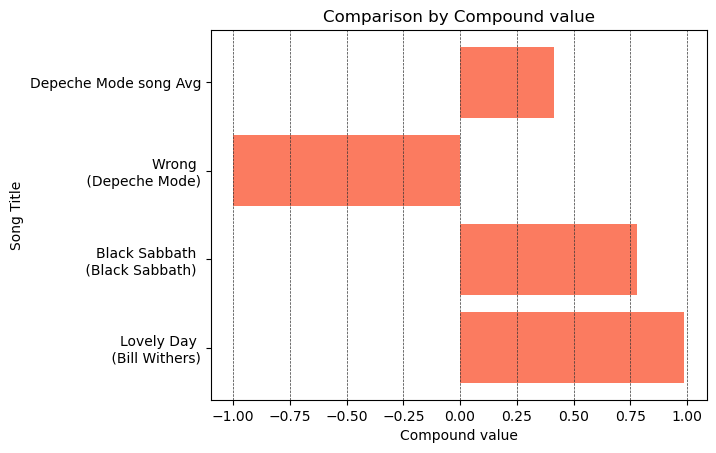

In [48]:
#function to create bar chart

def bar_chart(song_titles,pol_score_list):
    x=[]
    y= song_titles
    
    #x compound data 
    for i in pol_score_list:
        x.append(i['compound'])

    plt.ylabel("Song Title")
    plt.xlabel("Compound value")
    # show grid for clarity 
    plt.grid(axis ='x', color="#333333", linestyle = '--', linewidth = 0.5)
    # plot horizontal bar
    plt.barh(y, x, color = '#FB7B60')
    # title
    plt.title("Comparison by Compound value")

    plt.show()
    
bar_chart(['Lovely Day \n (Bill Withers)', 'Black Sabbath \n (Black Sabbath) ', 'Wrong \n (Depeche Mode)' , 'Depeche Mode song Avg']

,[pol_score_lovelyday, pol_score_bs_bs,pol_score_dm_neg,pol_score_dm_mean.to_dict() ])

Compound scale from -1 to 1. -0.50 is considered neagtive and 0.5 is positive. Wrong by Depeche Mode is very negative as it is almost -1. Black Sabbath by Black Sabbathis surprisingly indicate as positive since it is above 0.5 it is above 0.  Average Depeche Mode song is 0.25 which can be said as neutral.

<h1> 1.5 What words are judged as negative, pos, neu?</h1>

<h2>Function for finding what words are positive or negative </h2>

In [49]:
#find what words are pos or negative
def pos_neu_neg_words(corp,which_sent):
    
    sia = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    
    for word in corp:
        #compound which is the overall sentiment score is at 0.5 and above positive
        if (sia.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        #compound which is the overall sentiment score is less tha -0.5 is negative 
        elif (sia.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)                

    if which_sent == 'pos':
        return pos_word_list
    elif which_sent == 'neu':
        return neu_word_list
    elif which_sent == 'neg':
        return neg_word_list
    else:
        print('Second prameter should be either \"pos" \,"neu"\, "neg".')
        

In [50]:
#Depeche Mode All
print(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))

['sorrow', 'tortured', 'pain', 'crime', 'condemnation', 'suffer', 'condemnation', 'crime', 'injustice', 'death', 'death', 'death', 'war', 'death', 'death', 'die', 'death', 'pain', 'pain', 'loneliest', 'crime', 'die', 'worst', 'hell', 'sin', 'fail', 'stealing', 'stealing', 'pain', 'pain', 'failed', 'pain', 'sin', 'hate', 'hate', 'hate', 'failing', 'crime', 'crime', 'gloom', 'hate', 'hate', 'hate', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'kill', 'saddest', 'loneliest', 'violence', 'perverted', 'sick', 'depression', 'sorrow', 'disastrous', 'hell', 'suffer', 'weep', 'tortured', 'failure', 'death', 'thief', 'death', 'death', 'anger', 'suffer', 'lying', 'sin', 'hurt', 'stupid', 'bitterest', 'stupid', 'devil', 'pain', 'devil', 'bad', 'liar', 'harm', 'stupid', 'failure', 'pain', 'worst', 'sick', 'die', 'pain', 'sorrow', 'hurt', 'dead', 'hate', 'hate', 'threat', 'suffer', 'pain', 'ugly', 'harm', 'hurt', 'hurt', 'hurt', 'death', 'death', 'kill', 'pain', 'pain', 'cur

<h2>This is too hard to read so need to plot but is more meaningful with the most frequent word as too many words in small real estate makes it impossible to read the plot</h2>

<h1> 1.6 Frequency Analysis</h1>
What is the  frequency of words used for All Depeche Mode song. 

<h2>Helper function to sort dict data</h2>

In [51]:
# Helper function
# sort dic by value function
def sort_dict(data_dict):
    #sort by value ascending
    keys = list(data_dict.keys())

    values = list(data_dict.values())

    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    
    return sorted_dict
    

<h2>Function for counting words</h2>

In [52]:
# straight count of words count 
def raw_count(tokens):
    counts_dict = { } # dictionary
    
    for word in tokens:
        
        if word not in counts_dict:
            #every word should be counted so when iterate automatically 1
            counts_dict[word] = 1
            #when word already there should be +1
        else:
            counts_dict[word]=counts_dict[word]+1
    return counts_dict



<h2>Positive &amp; Negative word Raw Counts</h2>

In [53]:
#positive word frequency
dm_pos_words=raw_count(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'pos'))
#sorted and print frequency
print('Positive words Counts: ', sort_dict(dm_pos_words))

Positive words Counts:  {'adore': 1, 'gain': 1, 'success': 1, 'reward': 1, 'divine': 1, 'rich': 1, 'passionately': 1, 'brilliant': 1, 'positive': 1, 'enlightening': 1, 'enlighten': 1, 'ecstasy': 1, 'glorious': 1, 'brilliantly': 1, 'greatest': 1, 'wisdom': 1, 'great': 1, 'wonderful': 1, 'gracious': 1, 'praise': 1, 'miracle': 1, 'happiness': 2, 'beautiful': 2, 'bliss': 2, 'ideal': 2, 'happier': 2, 'confidence': 2, 'celebrate': 2, 'laugh': 3, 'paradise': 3, 'perfection': 4, 'freedom': 4, 'prize': 4, 'blessed': 4, 'perfect': 4, 'strong': 4, 'happiest': 5, 'heavenly': 5, 'lover': 5, 'glory': 5, 'precious': 5, 'loved': 7, 'beauty': 9, 'trust': 10, 'pleasure': 11, 'happy': 11, 'joy': 11, 'best': 13, 'fun': 13, 'kind': 13, 'peace': 13, 'heaven': 15, 'free': 32, 'love': 171}


In [54]:
#negative  word frequency
dm_neg_words=raw_count(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))
#sorted and print frequency
print('Negative words Counts: ',sort_dict(dm_neg_words) )
#use panda to see clear way
# pd.DataFrame.from_dict(sort_dict(dm_neg_words), orient='index')


Negative words Counts:  {'fail': 1, 'disastrous': 1, 'depression': 1, 'bitterest': 1, 'perverted': 1, 'bad': 1, 'saddest': 1, 'liar': 1, 'gloom': 1, 'failing': 1, 'threat': 1, 'failed': 1, 'ugly': 1, 'drowned': 1, 'thief': 1, 'heartbreak': 1, 'tragedy': 1, 'evil': 1, 'harshest': 1, 'war': 1, 'cheating': 1, 'injustice': 1, 'cancer': 1, 'cruel': 1, 'murder': 1, 'horror': 1, 'terror': 1, 'curse': 1, 'anger': 2, 'failure': 2, 'died': 2, 'hell': 2, 'condemnation': 2, 'sick': 2, 'loneliest': 2, 'worst': 2, 'stealing': 2, 'tortured': 3, 'danger': 3, 'weep': 3, 'sorrow': 3, 'lying': 4, 'torture': 4, 'kill': 4, 'violence': 4, 'stupid': 5, 'harm': 5, 'misery': 5, 'devil': 5, 'dead': 6, 'crime': 7, 'hurt': 7, 'die': 7, 'hate': 9, 'suffer': 10, 'death': 13, 'sin': 17, 'pain': 31}


<h2>Or counting with NLTK freq</h2>

In [55]:
#nltk freq
dm_neg_words_nltk_freq= nltk.FreqDist(dm_neg_words)

#use panda to see clear way
dm_neg_words_nltk_freq_df = pd.DataFrame.from_dict(sort_dict(dm_neg_words_nltk_freq), orient='index')
dm_neg_words_nltk_freq_df.tail()

,0
hate,9
suffer,10
death,13
sin,17
pain,31


<h2> IDF to identify keywords of DM songs.</h2>  The more frequent in the lyrics = lower value <br> The less frequent in the lyrics = higher value 


In [56]:
# total_words_num = len(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))


In [57]:
#function to get IDF from tokens
def get_idf_tokens(tokens):
#     call raw_count function above
    raw_counts_dict = raw_count(tokens)
  #get length of tokens / song words
    total_words_num = len(tokens)
      
    idf= { }
    
    for key in raw_counts_dict:
        idf[key] = 1/(raw_counts_dict[key] / (1.0 * total_words_num))
        
    return idf
    


In [58]:
#function for IDF from the raw counts
def get_idf_dict(freq_counts):

   
    total_words_num= len(freq_counts)
    
    idf= { }
    
    for key in counts_dict:
        idf[key] = 1/(counts_dict[key] / (1.0 * total_words_num))
        
    return idf
    

In [59]:
# with negative words IDF
dm_idf_neg=sort_dict(get_idf_tokens(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))) 

print(dm_idf_neg)


{'pain': 6.483870967741936, 'sin': 11.823529411764705, 'death': 15.461538461538462, 'suffer': 20.099999999999998, 'hate': 22.333333333333336, 'crime': 28.71428571428571, 'die': 28.71428571428571, 'hurt': 28.71428571428571, 'dead': 33.5, 'harm': 40.199999999999996, 'misery': 40.199999999999996, 'devil': 40.199999999999996, 'stupid': 40.199999999999996, 'kill': 50.25, 'lying': 50.25, 'violence': 50.25, 'torture': 50.25, 'danger': 67.0, 'weep': 67.0, 'tortured': 67.0, 'sorrow': 67.0, 'anger': 100.5, 'sick': 100.5, 'failure': 100.5, 'died': 100.5, 'loneliest': 100.5, 'worst': 100.5, 'condemnation': 100.5, 'hell': 100.5, 'stealing': 100.5, 'cheating': 201.0, 'harshest': 201.0, 'heartbreak': 201.0, 'evil': 201.0, 'tragedy': 201.0, 'cruel': 201.0, 'murder': 201.0, 'injustice': 201.0, 'horror': 201.0, 'terror': 201.0, 'cancer': 201.0, 'war': 201.0, 'saddest': 201.0, 'ugly': 201.0, 'perverted': 201.0, 'liar': 201.0, 'bad': 201.0, 'bitterest': 201.0, 'fail': 201.0, 'failed': 201.0, 'failing': 20

In [60]:
#negative words IDF into Dataframe
dm_idf_neg_df=pd.DataFrame.from_dict(dm_idf_neg, orient='index')
# dm_idf_neg_df

Looks more like DM keywords. Straight TF result seems more relevant as DM keywords.

<h2> 1.61 Plot DM Negative words frequency</h2>

<h2>Function for plotting line graph</h2>

In [61]:
# function for creaying line graph from pol score
def line_graph(dict_1d, chart_title, n, orient):

#     from matplotlib.pyplot import figure

    label_list = list(dict_1d.keys())
    val_list = list(dict_1d.values())
    
    plot_height= (len(label_list))* n
    #chart size in pixel
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.subplots(figsize=(600*px,  plot_height*px))
    

    #chart name
    plt.title(chart_title)
    x = np.array(label_list)
    y = np.array(val_list)
        
    if orient == 'key_value':
    
        plt.plot(x,y)
        
    elif orient == 'value_key':

        plt.plot(y,x)




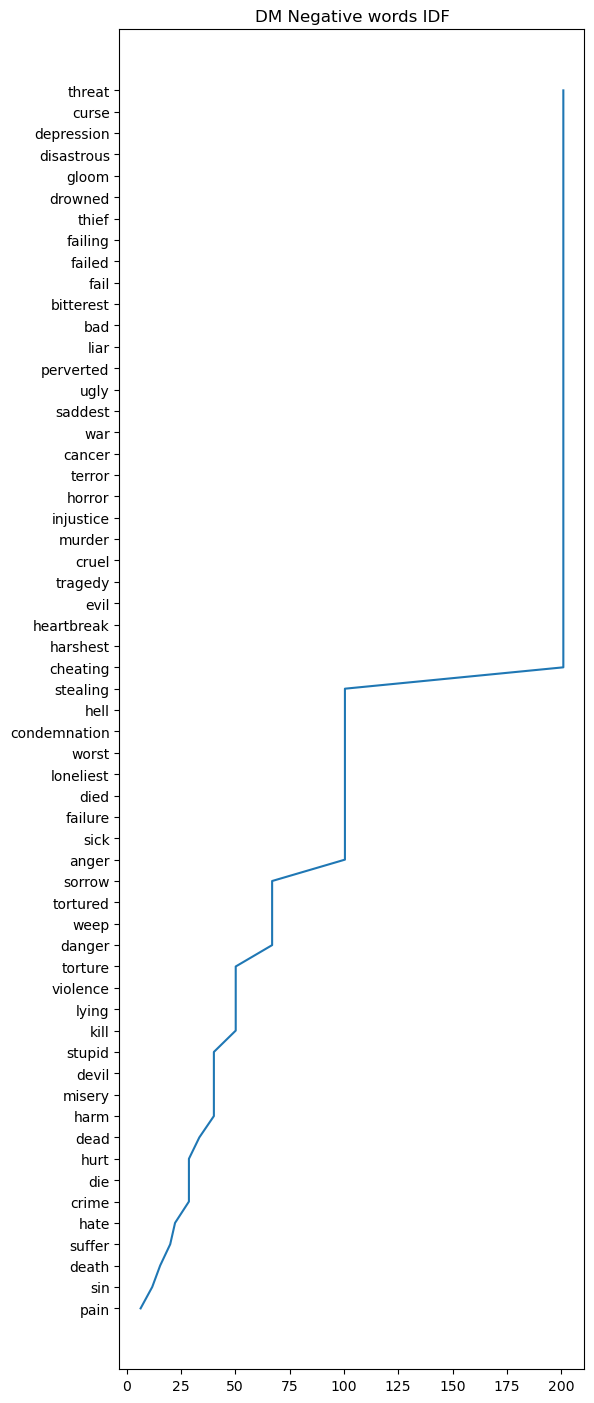

In [62]:
#Show DM Negative words IDF Graph
line_graph(dm_idf_neg, "DM Negative words IDF", 30, 'value_key')


<h2> 1.62 Negative Word Cloud</h2>

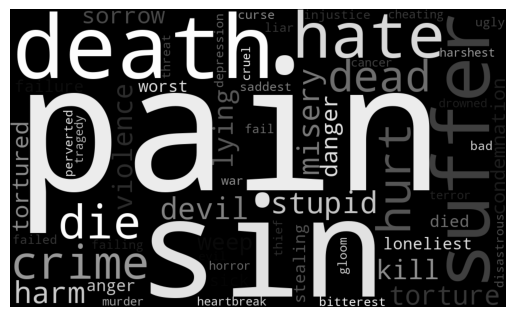

In [63]:
# word cloud to visualize from dict
wc_neg = WordCloud(width = 1000, height = 600 , colormap='binary', background_color='black').generate_from_frequencies(dm_neg_words_nltk_freq)
plt.axis("off")
plt.imshow(wc_neg)


<h2> 1.63 Positive Word Cloud</h2>

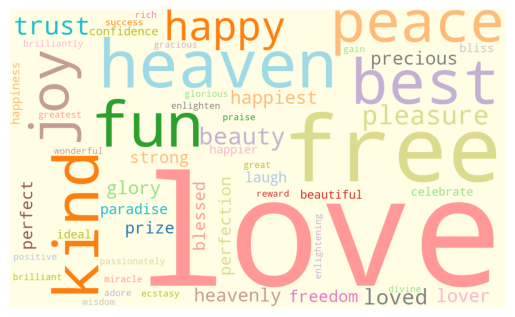

In [64]:
#positive
wc_pos = WordCloud(width = 1000, height = 600, colormap='tab20_r', background_color='#FFFDE4').generate_from_frequencies(dm_pos_words)
plt.axis("off")
plt.imshow(wc_pos)

<!-- With all DM songs -->

<h1>Part 2: Discography and hit chart ranking records scraped from wikipedia </h1>

<h2>2.1 Scraping from wikipedia</h2> To find the correlation with sentiment and popularity of the song I am using the discography data from the wiki since this is a data that is with creative common it shuould be good to use.

<h4>I need a data on singles hit chart so scraping this data from Depechemode Discography wiki: "https://en.wikipedia.org/wiki/Depeche_Mode_discography" </h4>
<h4>Using pandas.read_html since it parses table tags returns a list of DataFrame object </h4> <p> it seems more efficient than beautiful soup. also I had an issues with "tableToData()" method which was in the course material</p>


<h2>Search for the right table in the wiki</h2> by seraching for a unique words to the singles tables : <strong>"List of singles, with selected chart positions and certifications, showing year released and album name"</strong>


In [65]:
from unicodedata import normalize# perhaps we don't need since English wikipedia
url = "https://en.wikipedia.org/wiki/Depeche_Mode_discography"
#search for 'List of singles, with selected chart positions and certifications, showing year released and album name' in the tables
keyword ="List of singles, with selected chart positions and certifications, showing year released and album name"
tables_singles = pd.read_html(url, match = keyword)#returns list 
print(type(tables_singles))
print(len(tables_singles))
# print(tables_singles.shape)#error since it is list

<class 'list'>
3


should have more, 80s,90s, 00s,10s,20s = 5 lists. lets check

In [66]:
tables_singles[0]#80s
tables_singles[0].drop_duplicates()
tables_singles[0].head()

Title  Year Peak chart positions                   \
                     Title  Year               UK [3] AUS [4] FRA [85]   
0         "Dreaming of Me"  1981                   57       —        —   
1               "New Life"  1981                   11       —        —   
2  "Just Can't Get Enough"  1981                    8       4       31   
3                "See You"  1982                    6       —        —   
4    "The Meaning of Love"  1982                   12       —        —   

                                                               \
  GER [7] IRL [86] ITA [87] NLD [9] SWE [10] SWI [11] US [88]   
0   45[C]        —        —       —        —        —       —   
1       —       22        —       —        —        —       —   
2       —       16        —      10       14        —       —   
3      44        9        —      49        —        —       —   
4      64       17        —       —       16        —       —   

                                    Certifications                Album  \
                                    Certifications                Album   
0                                              NaN  Non-album single[D]   
1                                              NaN        Speak & Spell   
2  BPI: Platinum[14] BVMI: Gold[15] FIMI: Gold[50]        Speak & Spell   
3                                  BPI: Silver[14]       A Broken Frame   
4                                              NaN       A Broken Frame   

  Unnamed: 14_level_0 Unnamed: 15_level_0  
  Unnamed: 14_level_1 Unnamed: 15_level_1  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

In [67]:
tables_singles[1]#90s
tables_singles[1].drop_duplicates()
tables_singles[1].head()

Title  Year Peak chart positions                           \
                   Title  Year               UK [3] AUS [4] FIN [90] GER [7]   
0    "Enjoy the Silence"  1990                    6      71        3       2   
1      "Policy of Truth"  1990                   16     143        5       7   
2     "World in My Eyes"  1990                   17     153        4       7   
3           "I Feel You"  1993                    8      37        1       4   
4  "Walking in My Shoes"  1993                   14      74        7      14   

                                                        \
  IRL [86] ITA [87] SPA [91] SWE [10] SWI [11] US [88]   
0        3        5        1        5        2       8   
1       11        7        7       20       12      15   
2        7       28        2        —        5      52   
3        6        4        1        2        4      37   
4       15        9        6        8       26      69   

                                      Certifications  \
                                      Certifications   
0  BPI: Platinum[14] BVMI: Platinum[15] FIMI: Pla...   
1                                                NaN   
2                                                NaN   
3                                     RIAA: Gold[20]   
4                                                NaN   

                         Album Unnamed: 14_level_0  
                         Album Unnamed: 14_level_1  
0                     Violator                 NaN  
1                     Violator                 NaN  
2                     Violator                 NaN  
3  Songs of Faith and Devotion                 NaN  
4  Songs of Faith and Devotion                 NaN

In [68]:
tables_singles[2]#10s
tables_singles[2].drop_duplicates()
tables_singles[2].tail()

Title  \
                                               Title   
3                                 "Should Be Higher"   
4                           "Where's the Revolution"   
5                                  "Going Backwards"   
6                                         "Cover Me"   
7  "—" denotes a recording that did not chart or ...   

                                                Year  \
                                                Year   
3                                               2013   
4                                               2017   
5                                               2017   
6                                               2017   
7  "—" denotes a recording that did not chart or ...   

                                Peak chart positions  \
                                              UK [3]   
3                                                 81   
4                                               —[K]   
5                                                  —   
6                                               —[N]   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                             AUT [5]   
3                                                 60   
4                                                  —   
5                                                  —   
6                                                  —   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                       BEL (WA) [92]   
3                                                  —   
4                                               —[L]   
5                                               —[M]   
6                                               —[O]   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                            FRA [85]   
3                                                 58   
4                                                 22   
5                                                 90   
6                                                 67   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                             GER [7]   
3                                                 19   
4                                                 29   
5                                                  —   
6                                                  —   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                            HUN [93]   
3                                                 11   
4                                                  3   
5                                                  7   
6                                                 35   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                            IRL [86]   
3                                                  —   
4                                                  —   
5                                                  —   
6                                                  —   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                            ITA [87]   
3                                                  —   
4                                                  —   
5                                                  —   
6                                                  —   
7  "—" denotes a recording that did not chart or ...   

                                                      \
                                            SWI [11]   
3    

<h2>Missing 00s and 20s</h2>  
00s, 20s table has slightly differnt words.  "List of singles, with selected chart positions, showing year released and album name" using this for 00s

In [69]:
keyword2="List of singles, with selected chart positions, showing year released and album name"
tables_singles2 = pd.read_html(url, match = keyword2)#returns list 
print(len(tables_singles2))

2


<h2>2.2 Cleaning data for analysis</h2>

<h3> Create a  function to remove substring  a string '"—" denotes a recording that did not chart or was not released in that territory.'</h3>  

<h2>Function remove substring from DF</h2>

In [70]:
# dataframe version

def remove_substring_df(df, substring, col1,col2):
  
    filter_string=df[col1][col2].str.contains(substring)
    cleaned_df = df[~filter_string]
    
    return cleaned_df

In [71]:
#df w=after substrings removed
substr ='"—" denotes a recording that did not chart or was not released in that territory.'
df_90s =remove_substring_df(tables_singles[1], substr, 'Title','Title')
df_80s =remove_substring_df(tables_singles[0], substr , 'Title','Title')
df_00s =remove_substring_df(tables_singles2[0], substr , 'Title','Title')
df_10s =remove_substring_df(tables_singles[2], substr , 'Title','Title')
df_20s =remove_substring_df(tables_singles2[1], substr , 'Title','Title')

#check with 80s
df_80s.tail()

Title  Year Peak chart positions                   \
                         Title  Year               UK [3] AUS [4] FRA [85]   
20                 "Little 15"  1988                   60       —       93   
21           "Strangelove '88"  1988                    —       —        —   
22                  "Route 66"  1988                    —   79[H]        —   
23  "Everything Counts" (live)  1989                   22       —       29   
24            "Personal Jesus"  1989                   13     134       27   

                                                                \
   GER [7] IRL [86] ITA [87] NLD [9] SWE [10] SWI [11] US [88]   
20      16        —        —       —        —       18       —   
21       —        —        —       —        —        —      50   
22       —        —        —       —        —        —       —   
23      12       17       35      89        —       18       —   
24       5        7        3      62       17        5      28   

                                     Certifications                 Album  \
                                     Certifications                 Album   
20                                              NaN  Music for the Masses   
21                                              NaN  Music for the Masses   
22                                              NaN      Non-album single   
23                                              NaN                   101   
24  BPI: Gold[14] FIMI: Platinum[50] RIAA: Gold[20]              Violator   

   Unnamed: 14_level_0 Unnamed: 15_level_0  
   Unnamed: 14_level_1 Unnamed: 15_level_1  
20                 NaN                 NaN  
21                 NaN                 NaN  
22                 NaN                 NaN  
23                 NaN                 NaN  
24                 NaN                 NaN

<h2>Create dataframe with the uk data only. </h2> UK chart is the only one data being consistently present in each decade so it is probably the best data to use. 
Also There are colums at the end that's not useful. we also don't need certifications. so create a function to remove those as well.


In [72]:
#function streamline  into album, year, song title and UK ranking

def data_uk_only(df, n):    
    df1 = df
    #last garbage two
    for i in range(n):

        df_dropped = df1.drop(df1.columns[-1],axis=1)

        df1 = df_dropped    
        
    #remove the certifications
    df_new = df1.drop(df1.columns[12],axis=1)
    
    # remove other countries
    df_new2= df_new.drop( df_new.columns[3:12],axis=1)
    
    return df_new2


In [73]:
#dataframes with only UK data
df_80s_uk = data_uk_only(df_80s, 2)#remove last 2
df_90s_uk = data_uk_only(df_90s, 1)
df_00s_uk = data_uk_only(df_00s, 1)
df_10s_uk = data_uk_only(df_10s, 1)
df_20s_uk = data_uk_only(df_20s, 2)#remove last 2

In [74]:
df_90s_uk

,Title,Year,Peak chart positions,Album
,Title,Year,UK [3],Album
0,"""Enjoy the Silence""",1990,6,Violator
1,"""Policy of Truth""",1990,16,Violator
2,"""World in My Eyes""",1990,17,Violator
3,"""I Feel You""",1993,8,Songs of Faith and Devotion
4,"""Walking in My Shoes""",1993,14,Songs of Faith and Devotion
5,"""Condemnation""",1993,9,Songs of Faith and Devotion
6,"""In Your Room""",1994,8,Songs of Faith and Devotion
7,"""Barrel of a Gun""",1997,4,Ultra
8,"""It's No Good""",1997,5,Ultra


<h3>combine all decade</h3>  Probably easy to have them in one dataframe for some operation

In [75]:
#2020's have slightly different colum names so unify this
df_20s_uk.rename(columns = {'UK Sales [98]':'UK [3]'}, inplace = True)

#combining all data frame from 80s through 20s
frames = [df_80s_uk, df_90s_uk, df_00s_uk, df_10s_uk,df_20s_uk]
df_all_decades_uk = pd.concat(frames , ignore_index=True)
df_all_decades_uk.tail()

,Title,Year,Peak chart positions,Album
,Title,Year,UK [3],Album
59,"""Wagging Tongue""",2023,22,NaN
60,"""Speak to Me""",2023,—,NaN
61,"""My Favourite Stranger""",2023,19,NaN
62,"""Before We Drown""[108]",2024,16,NaN
63,"""People Are Good""",2024,52,NaN


<h2>Removing row with ("—" , "—[K]", "—[N]") from the data </h2> those are didn't rank in the chart

In [76]:
#Function to removing unwanted string from the chart data ("—" , —[K], —[N]) 
def remove_hyphen(df,colname1,colname2,uk_chart_substring): 
    hyphen = df_all_decades_uk[colname1][colname2].str.contains(uk_chart_substring)
    df_new= df[~hyphen]
    return df_new
    

In [77]:
#remove the hyphen
df_all_decades_uk_clean=remove_hyphen(df_all_decades_uk ,'Peak chart positions','UK [3]', "—")


<h3>Fix the redundant column names Finally</h3>

In [78]:
# fix the redundant column names
df_all_decades_uk_clean.columns = ['Title', 'Year','UK', 'Album']


<h3>Remove double quotes</h3>

In [79]:
#removing double quotes from the song title
df_all_decades_uk_clean['Title'] = df_all_decades_uk_clean['Title'].str.replace(r'\"', '' , regex=True)



/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/857057923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_decades_uk_clean['Title'] = df_all_decades_uk_clean['Title'].str.replace(r'\"', '' , regex=True)


<h3> Removing Live and Remixes</h3>  Remixes can have an influence of the artist remixing therefore removing them here. Original Evrythign counts is in the chart so is redundant duplicate.

In [80]:
def remove_substr(df,colname1,substr):
    
    substring_filter = df[colname1].str.contains(substr)
    df_new= df[~substring_filter]
    
    return df_new



In [81]:
# Live and remix has parethesis so look for that
df_all_decades_uk_no_remix=remove_substr(df_all_decades_uk_clean, 'Title', '\(')  

In [82]:
df_all_decades_uk_no_remix

,Title,Year,UK,Album
0,Dreaming of Me,1981,57,Non-album single[D]
1,New Life,1981,11,Speak & Spell
2,Just Can't Get Enough,1981,8,Speak & Spell
3,See You,1982,6,A Broken Frame
4,The Meaning of Love,1982,12,A Broken Frame
5,Leave in Silence,1982,18,A Broken Frame
6,Get the Balance Right!,1983,13,Non-album single
7,Everything Counts,1983,6,Construction Time Again
8,"Love, in Itself",1983,21,Construction Time Again
9,People Are People,1984,4,Some Great Reward


In [83]:
#updating rows
df_all_decades_uk_no_remix.loc[11] = [ 'Blasphemous Rumours' ,'1984' ,'16','Some Great Reward']
df_all_decades_uk_no_remix.loc[14]   = ['Stripped', '1986' ,'15', 'Black Celebration']
df_all_decades_uk_no_remix.loc[45]   = ['John the Revelator', '2006' ,'18', 'Playing the Angel']
df_all_decades_uk_no_remix.loc[19] = ['Behind the Wheel','1987', '21', 'Music for the Masses']
df_all_decades_uk_no_remix.loc[62] = ['Before We Drown','2024' ,'16','']


In [84]:
#adding the new row
df_all_decades_uk_no_remix.loc[len(df_all_decades_uk_no_remix.index)] = ['Lilian', '2006' ,'18', 'Playing the Angel']

df_all_decades_uk_no_remix.loc[len(df_all_decades_uk_no_remix.index)] =['But Not Tonight', '1986' ,'15', 'Black Celebration']

df_all_decades_uk_no_remix.loc[len(df_all_decades_uk_no_remix.index)] =['Somebody', '1986' ,'15', 'Black Celebration']

<h2>Save as CSV files as a precaution for the network issue and any unexpected changes happen to wikipage</h2> 

In [85]:
#save to csv(turned off to prevent overwritten)
#df_all_decades_uk_no_remix.to_csv('dm_all_decade_uk.csv', index=False)

# #create dataframe again from the saved csv
df_all_decades_uk_from_csv =pd.read_csv('dm_all_decade_uk.csv', encoding='utf-8', keep_default_na=False,skipinitialspace=True)
df_all_decades_uk_from_csv

,Title,Year,UK,Album
0,Dreaming of Me,1981,57,Non-album single[D]
1,New Life,1981,11,Speak & Spell
2,Just Can't Get Enough,1981,8,Speak & Spell
3,See You,1982,6,A Broken Frame
4,The Meaning of Love,1982,12,A Broken Frame
5,Leave in Silence,1982,18,A Broken Frame
6,Get the Balance Right!,1983,13,Non-album single
7,Everything Counts,1983,6,Construction Time Again
8,"Love, in Itself",1983,21,Construction Time Again
9,People Are People,1984,4,Some Great Reward


<h2>2.3 Analysis on hit chart ranking data </h2>

<h3>find the ranking</h3>

In [86]:
chart_uk_int = pd.to_numeric(df_all_decades_uk_from_csv['UK'])

#highest rank
print('highest rank:' , chart_uk_int.min())
#find the average
print('average:' , chart_uk_int.mean())
print('median:' , chart_uk_int.median())
#lowest rank
print('lowest rank:' , chart_uk_int.max())

highest rank: 4
average: 20.037735849056602
median: 16.0
lowest rank: 88


<h3>Function to find the how many hit songs per decade</h3>

In [87]:
def hitchart_by_decade(df_chart):
  
    total_entry = 52
    count_80=0
    count_90=0
    count_00=0
    count_10=0
    count_20=0

    for index, row in df_chart.iterrows():
        if row['Year'] > 1980 and row['Year'] < 1990:
            count_80=count_80 + 1
            
    for index, row in df_chart.iterrows():
        if row['Year'] > 1990 and row['Year'] < 2000:
            count_90=count_90 + 1
            
    for index, row in df_chart.iterrows():
        if row['Year'] > 2000 and row['Year'] < 2010:         
            count_00=count_00 + 1
            
    for index, row in df_chart.iterrows():
        if row['Year'] > 2010 and row['Year'] < 2020:         
            count_10=count_10 + 1
            
    for index, row in df_chart.iterrows():
        if row['Year'] > 2020 and row['Year'] < 2030:         
            count_20=count_20 + 1
            
    return { '1980s': count_80, '1990s': count_90, '2000s':  count_00, '2010s':count_10, '2020': count_20 }

#how many chart by decade
hitchart_by_decade_dict = hitchart_by_decade(df_all_decades_uk_from_csv)
hitchart_by_decade_dict

{'1980s': 23, '1990s': 9, '2000s': 10, '2010s': 2, '2020': 6}

<h3>Helper function to get DF by a period of years(decade)

In [88]:
#return dataframe by decade or teh certain period
def decade_df(df, start_year, end_year):
    
    df_temp1 =df[df['Year']> start_year]
    df_temp2= df_temp1[df['Year']< end_year ]

    return df_temp2


<h3>Find average and median ranking per the decade</h3>

In [89]:
#80s
df_temp_80=decade_df(df_all_decades_uk_from_csv, 1980, 1990 )

df_temp_80_avg=df_temp_80['UK'].mean()
df_temp_80_median=df_temp_80['UK'].median()

#90s
df_temp_90 =decade_df(df_all_decades_uk_from_csv, 1990, 2000 )

df_temp_90_avg=df_temp_90['UK'].mean()
df_temp_90_median=df_temp_90['UK'].median()

# #00s
df_temp_00 = decade_df(df_all_decades_uk_from_csv, 2000, 2010 )
df_temp_00_avg=df_temp_00['UK'].mean()
df_temp_00_median=df_temp_00['UK'].median()

# #10s

df_temp_10 =decade_df(df_all_decades_uk_from_csv, 2010, 2020 )

df_temp_10_avg=df_temp_10['UK'].mean()
df_temp_10_median=df_temp_10['UK'].median()

# #20s

df_temp_20 =decade_df(df_all_decades_uk_from_csv, 2020, 2030 )

df_temp_20_avg=df_temp_20['UK'].mean()
df_temp_20_median=df_temp_20['UK'].median()


print('80s avg',df_temp_80_avg)
print('80s median',df_temp_80_median)
print('90s avg',df_temp_90_avg)
print('90s median',df_temp_90_median)
print('00s avg',df_temp_00_avg)
print('00s median',df_temp_00_median)
print('10s avg',df_temp_10_avg)
print('10s median',df_temp_10_median)
print('20s avg',df_temp_20_avg)
print('20s median',df_temp_20_median)



80s avg 18.434782608695652
80s median 16.0
90s avg 12.88888888888889
90s median 9.0
00s avg 18.0
00s median 14.0
10s avg 74.0
10s median 74.0
20s avg 25.833333333333332
20s median 20.5


/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]
/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]
/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]
/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]


<h2>Find the top ranking songs</h2>

In [90]:
#find the songs withinranked in top ten

def top_songs(df,ranking_num):
    topsongs_list = []

    for i in df.itertuples():

        if(pd.to_numeric(i[3]) <= ranking_num):
            #tuple with title, 
            topsongs_list.append((i[1], i[2],i[3]))
    return topsongs_list


In [91]:
top5_tuple_list = top_songs(df_all_decades_uk_from_csv, 5)
top5_tuple_list

[('People Are People', 1984, 4),
 ('Barrel of a Gun', 1997, 4),
 ("It's No Good", 1997, 5),
 ('Precious', 2005, 4)]

In [92]:
top10_tuple_list = top_songs(df_all_decades_uk_from_csv, 10)
top10_tuple_list

[("Just Can't Get Enough", 1981, 8),
 ('See You', 1982, 6),
 ('Everything Counts', 1983, 6),
 ('People Are People', 1984, 4),
 ('Master and Servant', 1984, 9),
 ('Enjoy the Silence', 1990, 6),
 ('I Feel You', 1993, 8),
 ('Condemnation', 1993, 9),
 ('In Your Room', 1994, 8),
 ('Barrel of a Gun', 1997, 4),
 ("It's No Good", 1997, 5),
 ('Dream On', 2001, 6),
 ('Precious', 2005, 4)]

<h2> 2.4 Combine hit chart analysis with sentiment analysis</h2>

<h3>Find out if hit songs exist in the Lyrics dataframe</h3>

In [93]:
#extract the data for all hit songs
top100_tuple_list = top_songs(df_all_decades_uk_from_csv, 100)

In [94]:
for x in top100_tuple_list:
#     print(x[0])
    print(find_song(depeche_lyrics_df, x[0]))

Dreaming Of Me exists at 12
New Life exists at 133
Just Can't Get Enough exists at 117
See You exists at 49
The Meaning Of Love exists at 155
Leave In Silence exists at 118
Get the Balance Right! doesnt exist
Everything Counts exists at 13
Love, In Itself exists at 124
People Are People exists at 40
Master And Servant exists at 127
Blasphemous Rumours exists at 79
Shake The Disease exists at 145
It's Called A Heart exists at 31
Stripped exists at 151
A Question Of Lust exists at 75
A Question Of Time exists at 76
Strangelove exists at 150
Never Let Me Down Again exists at 131
Behind The Wheel exists at 5
Little 15 exists at 34
Personal Jesus exists at 41
Enjoy The Silence exists at 93
Policy Of Truth exists at 142
World In My Eyes exists at 72
I Feel You exists at 23
Walking In My Shoes exists at 164
Condemnation exists at 9
In Your Room exists at 113
Barrel Of A Gun exists at 4
It's No Good exists at 115
Home exists at 22
Useless exists at 68
Only When I Lose Myself exists at 137
Drea

<h3>The lyrics data doesn't have latest songs from the 20s. and some older songs
</h3>

Get the Balance Right! doesnt exist 1983 ranked at 13

Soothe My Soul doesnt exist 2013 ranked at 88



<h2>Modify find song function to only return index and skip the ones without lyrics</h2>

In [95]:
#modify find song function to return only index
def find_song_index(panda_df,song_title):
    for index, row in panda_df.iterrows():
        #iterating Indexes and rows
     #lower case since title case is tricky
        if row['song'].lower() == song_title.lower():
            return index
        
    return False
            

<h2>Sentiment analysis for top songs</h2>

In [96]:
#get sentiment analysis polscore(neg, neu, pos, compound) and songs names only they exist in the lyrics data 

def top_dm_song_sas(top_song_tuple_list):
    

    top_sas =[]
   
    for x in top_song_tuple_list:
            
        song_index = find_song_index(depeche_lyrics_df, x[0])
        
    #if song exist do get title and sentiment analysis
        if(song_index):
           
            pol_score_top_song= sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'], song_index)))))
            top_sas.append((x[0], x[1], pol_score_top_song))
       
    #skip if song is not found
        else:
            continue
    #return tuple of  string and dict 
    return top_sas



In [97]:
#top 10 songs year and  with full pol scores
top10_dm_song_sas= top_dm_song_sas(top_songs(df_all_decades_uk_from_csv, 10))

<h2>Modify to get only song name, year, compound </h2>

In [98]:
#get compound data and songs names only they exist in the lyrics data 
def top_dm_song_sas_compound(top_song_tuple_list):
    

    top_sas =[]
   
    for x in top_song_tuple_list:
            
        song_index = find_song_index(depeche_lyrics_df, x[0])
        
    #if song exist do get title and sentiment analysis
        if(song_index):
#           
            pol_score_top_song= sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'], song_index)))))
            top_sas.append((x[0], x[1], pol_score_top_song['compound']))
       
    #skip if song is not found
        else:
            continue
    #return tuple of  string and dict 
    return top_sas


#test 
top5_dm_song_sas_compound = top_dm_song_sas_compound(top_songs(df_all_decades_uk_from_csv, 5))
top5_dm_song_sas_compound


[('People Are People', 1984, -0.0377),
 ('Barrel of a Gun', 1997, -0.959),
 ("It's No Good", 1997, 0.9694),
 ('Precious', 2005, 0.9517)]

<h2>Create DataFrame with sentiment compound data</h2>

In [99]:
#create date with all songs hit songs
top100_dm_song_sas_compound = top_dm_song_sas_compound(top_songs(df_all_decades_uk_from_csv, 100))

#create dataframe of sentiment(compound) and song chart info
top100_df_sa=pd.DataFrame.from_records(top100_dm_song_sas_compound, columns =['Title','Year', 'Sentiment'])
top100_df_sa


,Title,Year,Sentiment
0,Dreaming of Me,1981,-0.2023
1,New Life,1981,-0.6486
2,Just Can't Get Enough,1981,0.9678
3,See You,1982,0.9913
4,The Meaning of Love,1982,0.9946
5,Leave in Silence,1982,-0.9406
6,Everything Counts,1983,0.9671
7,"Love, in Itself",1983,0.9903
8,People Are People,1984,-0.0377
9,Master and Servant,1984,0.9825


In [100]:
#find the mean and median sentiment
print('All hit songs Average sentiment' , top100_df_sa['Sentiment'].mean())
print('All hit songs Median sentiment', top100_df_sa['Sentiment'].median())


All hit songs Average sentiment 0.47222666666666674
All hit songs Median sentiment 0.9178


<h2>Find median &amp; average sentiment by decade </h2>

In [101]:
# sentiment by decade
sa_80s=decade_df(top100_df_sa, 1980, 1990)
sa_90s=decade_df(top100_df_sa, 1990, 2000)
sa_00s=decade_df(top100_df_sa, 2000, 2010)
sa_10s=decade_df(top100_df_sa, 2010, 2020)

sa_80s_med = sa_80s['Sentiment'].median()
sa_90s_med = sa_90s['Sentiment'].median()
sa_00s_med = sa_00s['Sentiment'].median()
sa_10s_med = sa_10s['Sentiment'].median()

print('sentiment 80s median' , sa_80s_med)
print('sentiment 90s median' , sa_90s_med)
print('sentiment 00s median' , sa_00s_med)
print('sentiment 10s median' , sa_10s_med)


sentiment 80s median 0.9633
sentiment 90s median 0.9022
sentiment 00s median 0.5081
sentiment 10s median 0.9423


/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]
/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]
/var/folders/hq/v9cnw51x5tj4pwrlnyp8bvkh0000gn/T/ipykernel_3124/2794269319.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp2= df_temp1[df['Year']< end_year ]


In [102]:
def decade_avg_sent(df_clean, start_year_str, end_year_str):
  
    total = 0
    count= 0

    for index, row in df_clean.iterrows():
        if row['Year'] >= start_year_str and row['Year'] < end_year_str:

            total= total + row['Sentiment']
            count=count + 1

    return total/count

print('80s sentiment', decade_avg_sent(top100_df_sa, 1980, 1990) )
print('90s sentiment', decade_avg_sent(top100_df_sa, 1990, 2000) )
print('00s sentiment', decade_avg_sent(top100_df_sa, 2000, 2010) )
print('10s sentiment', decade_avg_sent(top100_df_sa, 2000, 2020) )


80s sentiment 0.6218318181818182
90s sentiment 0.28246666666666664
00s sentiment 0.3238
10s sentiment 0.3800272727272727


<h3> Helper function to get songs names from list of tuples</h3>

In [103]:
#helper to get songs names from tuple
def song_on_tuple(tup_list):
    song_names =[]
    
    for x in tup_list:
        song_names.append(x[0])
    return song_names

#test
song_on_tuple(top_dm_song_sas(top_songs(df_all_decades_uk_from_csv, 5)))


['People Are People', 'Barrel of a Gun', "It's No Good", 'Precious']

<h3> Helper function to get year names from list of tuples</h3>

In [104]:
#get the year from the tupple list
def year_on_tuple(tup_list):
    song_years =[]
    for x in tup_list:
        song_years.append(x[1])
    return song_years  

#test
year_on_tuple(top_dm_song_sas(top_songs(df_all_decades_uk_from_csv, 5)))

[1984, 1997, 1997, 2005]

<!-- <h2>Save to pandas dataframe  </h2> -->

<h2>2.51 Bar Chart: Top 10 Song sentiment</h2>
<h2> Updated function to create bar  chart from the list of the tuples<?h2>

In [105]:
#function to create bar chart from tuple list

def bar_chart2(list_tupple_dict):
    

    #using helper function to get the song title
    song_titles= song_on_tuple(list_tupple_dict)
    x=[]
    y= song_titles
    
    # loop over each tuples i the list
    
    for i in list_tupple_dict:
    #i is the tuple  i[1] is year i[2] is dict
    #push dict to x list
        x.append(i[2]['compound'])

        
    plt.ylabel("Song Title")
    plt.xlabel("Compound value")
    # show grid for clarity 
    plt.grid(axis ='x', color="#333333", linestyle = '--', linewidth = 0.5)
    # plot horizontal bar
    plt.barh(y, x, color = '#FB7B60')
    # title
    plt.title("Comparison by Compound value")

    plt.show()
    


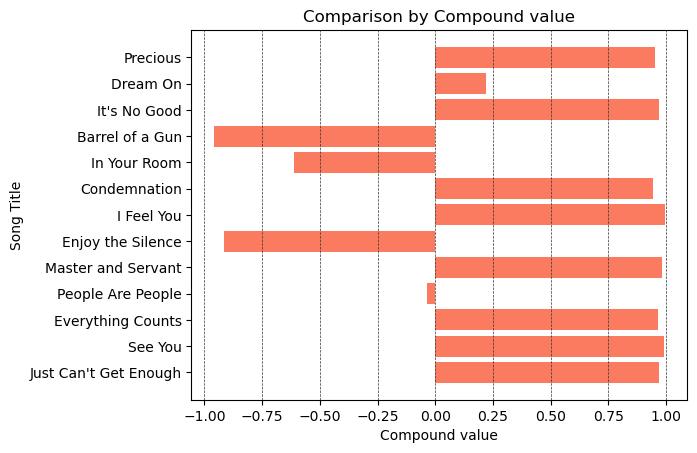

In [106]:
bar_chart2(top10_dm_song_sas)

<h2>2.52 Pie chart: Ratio of hit singles by decade<h2>

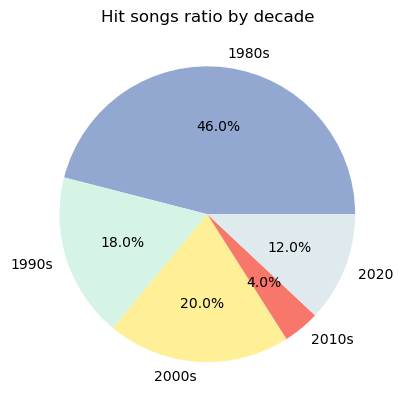

In [107]:
# function for creaying pie chart from pol score
def create_pie2(data_dict, chart_title):
        #{'1980s': 23, '1990s': 9, '2000s': 10, '2010s': 2, '2020': 6}
      
    slice_colors = ['#92a8d1','#d5f4e6','#ffef96', '#f7786b','#deeaee']
      
    #chart name
    plt.title(chart_title)

    label_list = list(data_dict.keys())
    value_list = list(data_dict.values() )
        


    y = np.array(value_list)
    
    # plot with labels and automatic percentage for clarity
    plt.pie(y,labels = label_list, autopct='%1.1f%%', colors=slice_colors) 
   
    plt.show()

 #pie chart
create_pie2(hitchart_by_decade_dict, 'Hit songs ratio by decade')
   

<h2>2.53: Line chart: Median sentiment Analysis by decade</h2>

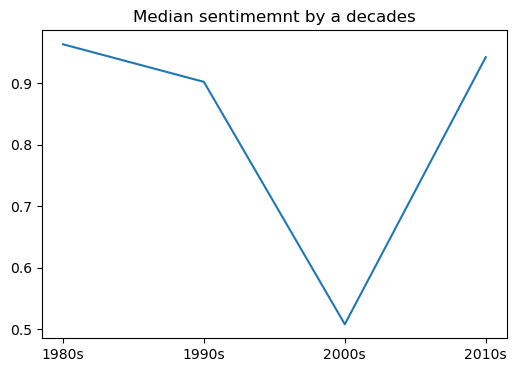

In [127]:
#Calling fuction to create the line chart
#Create a chart with Median Sentiment by decde
decade_sent_dict={'1980s':sa_80s_med , '1990s': sa_90s_med, '2000s': sa_00s_med, '2010s': sa_10s_med}
line_graph(decade_sent_dict, "Median sentimemnt by a decades", 100, 'key_value')



<h3> Helper function to tokenize the lyrics matching with the song name from the tuple list </h3>

In [130]:
#function to find find teh matching lyrics from the song tuple list
def get_lyrics_tokenize(top_song_tuple_list):
    
#find a song index

    for x in top_song_tuple_list:
            
        song_index = find_song_index(depeche_lyrics_df, x[0])
        
    #if song exist do get title and sentiment analysis
        if(song_index):
            
           #loop 
            tokens =tokenize_song(depeche_lyrics_df['lyrics'],song_index)
            lemms = lemmatize_token(stopWords(tokens))


    #skip if song is not found
        else:
            continue
    #return tuple of  string and dict 
    return lemms

#get tokes for hit songs only
hit_song_token = get_lyrics_tokenize(top100_tuple_list)


In [132]:
#calling function to find pos neu neg words 
#negative words of hit songs
print('negative words',pos_neu_neg_words(hit_song_token,'neg'))
#positive words of hitsongs
print('positive words', pos_neu_neg_words(hit_song_token,'pos'))

negative words ['perverted', 'sick']
positive words ['passionately']


<h4>It is very interesting that only two negatove words and one positive words in the top songs! </h4>
  This means majority of words are neutal. I have no choice but creating a word cloud with all sentiment types.

<h2> 2.54 word cloud of hit singles </h2>
    
<h4>function to get a word freqency from a tuples of song and year</h4>

In [139]:
def word_freq_top_song(top_song_tuple_list):
    
#find a song index

    for x in top_song_tuple_list:
            
        song_index = find_song_index(depeche_lyrics_df, x[0])
        
    #if song exist do get title and sentiment analysis
        if(song_index):
            
           #loop 
            tokens =tokenize_song(depeche_lyrics_df['lyrics'],song_index)
            word_freq_dp_song = nltk.FreqDist(lemmatize_token(stopWords(tokens)))


    #skip if song is not found
        else:
            continue
    #return tuple of  string and dict 
    return word_freq_dp_song


# call function with top100_tuple_list
topsingles_wordfreq = word_freq_top_song(top100_tuple_list)
                  

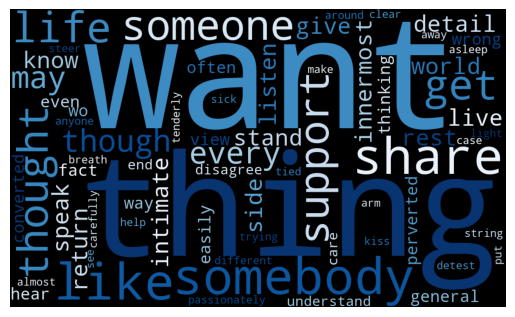

In [150]:
#word cloud with hit songs
wc_topsingles = WordCloud(width = 1000, height = 600 , colormap='Blues', background_color='black').generate_from_frequencies(topsingles_wordfreq)
plt.axis("off")
plt.imshow(wc_topsingles)

<h1>Conclusion</h1>
<h2>Are Depeche Mode songs really negative?</h2>

<h3> What is the  most negative song? what are the average sentiment of all songs?  </h3>

Wrong is the most negative song of all DM songs with a whopping -0.9995 compound!<br>
 
Depeche Mode's average sentiment per song lyrics is 0.407116. <br>
Depeche Mode's Median sentiment per song lyrics is 0.83665. <br>

Compounds below -0.5 can be considered negative, therefore their average sentiment is not negative.<br>
In fact rather neutral. With the Median being 0.83665 and they seem to write more positive songs than negative songs.


<h3>Comparing to famous negative and positive songs from other artists</h3>

When compared to the most negative song(Wrong) with Black Sabbath's Black Sabbath (the most negative to be perceived by most)  Wrong by Depeche Mode is far more negative as the compound value  is -0.9995. The compound of  Black Sabbath by Black Sabbath is 0.7783. Surprisingly it indicated as positive since it is above 0.5 


Interestingly, the most positive song of Depeche Mode(Freelove) has a higher compound value(0.9987) than  Lovely Day by Bill Withers(0.9881). 


<h3>Frequent words</h3>
Pain, Sin, Death/Dead, Suffer, Hate are the negative words that show up often in DM songs.


<h4> Singles hit chart analysis</h4>

<h4> average and median per decade</h4>
The highest rank of all time is 4.  All time average ranking is 23. ALl time Median is  16.0.<br>

When looking at the ranking average and median, DM’s hay day is the 90s since the average ranking is 12.9 and median ranking is 9.0. <br> 

2000s is the second successful with average 18.0 and median 14.0.
surprisinly 80s is third successful with average 18.43 and nedian 16.0

10s was least successful with median  and average value of 74.0


<h4> Comparing with the ratios of hit songs</h4>

When you analyze the ratio of hit songs. 80s was most suceessful with 46% of their hit songs were fron the 80s.  2000s with 20% and 1990s with 18%. verh interesting.
<br>




<h3>Correlation with popularity and the sentiment of the song in the UK</h3>
<strong>Top 5 songs sentiment</strong> <br>
Observing top 5 songs Barrel of a Gun  1997 ranked 5 is very negative(-0.959 ) however most are rather positive songs ranging from -0.0377 to 0.9517.  

People Are People 1984 4 -0.0377 <br>
Barrel of a Gun  1997 5  -0.959 <br>
It's No Good 1997 5 0.9694<br>
Precious 2005 4 0.9517

<h3>Hit songs sentiment by a decade</h3>

1980s average &amp; median sentiment are quite positive with a compound value of 0.621 &amp 0.9633. 1990s sentiment is pretty neutral with average (0.2825) but very positive in terms of median (0.9022). 
2000s average is 0.3238 with median 0.5081.  2010s average is 0.38 and median 0.9423

We can say 00s is the least positive.


<h3> DM Hit songs sentiment vs all DM songs </h3>
<h4>Hit songs</h4>
Average sentiment 0.4722 <br>
Median sentiment 0.9178 <br>

<h4>All songs</h4>
Average sentiment per song lyrics  is 0.4071<br>
Median sentiment per song lyrics  0.8367<br>

<h4> Hit songs</h4>
Hit songs tend to be positive side than average DM songs. <br>
This result aligns with the fact 80s had many hits songs from them and 80s sentiment was positive with 0.6218 compound value.

<h4> Word frequency of DM hit songs</h4>

When looked at choice of words from the hit song and checked the frequency of positive, negative and neutral. only two negative words('perverted' and 'sick') existed and one positive word('passionately').

From the perspective of word frequency, DM hit songs are neutral. 


<h3>Take away</h3>
Depeche mode is a bi-polar band. They have written extremely negative songs. Theyhave also written exteremely positive sentiment songs.

I really enjoyed working on this project, especially analyzing the correlation between hit charts and lyrics sentiment. Besides learning the techniques to get results and visualization, I also learned that the different approaches or measures can lead to different conclusions. This is something we all need to be careful about when analyzing more serious data.


<h1>Appendix</h1>
<h4>Resources</h4>


Pandas Dataframe manupilcations: <br>
https://pandas.pydata.org/
<br>
https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/
<br>
cleaning:<br>
https://www.geeksforgeeks.org/how-to-remove-punctuations-in-nltk/
<br>
Sentiment analysis:<br>
https://medium.com/@mystery0116/nlp-how-does-nltk-vader-calculate-sentiment-6c32d0f5046b
<br>
Matplotlib chart: <br>
https://www.w3schools.com/python/matplotlib_pie_charts.asp
<br>
Word cloud styleguide: <br>
https://kristendavis27.medium.com/wordcloud-style-guide-2f348a03a7f8
<br>
    